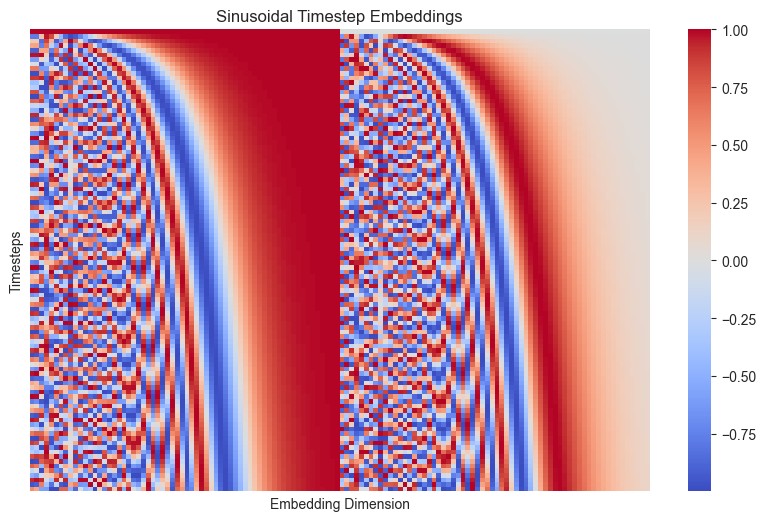

In [4]:
import math

import matplotlib.pyplot as plt
import seaborn as sns
import torch as th


def timestep_embedding(timesteps, dim, max_period=10000):
    half = dim // 2
    freqs = th.exp(-math.log(max_period) * th.arange(start=0, end=half, dtype=th.float32) / half)
    args = timesteps[:, None].float() * freqs[None]
    embedding = th.cat([th.cos(args), th.sin(args)], dim=-1)
    if dim % 2:
        embedding = th.cat([embedding, th.zeros_like(embedding[:, :1])], dim=-1)
    return embedding


# Generate embeddings
N = 100  # Number of timesteps
dim = 128  # Embedding dimension
timesteps = th.linspace(0, 1000, steps=N)
embeddings = timestep_embedding(timesteps, dim).numpy()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(embeddings, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.xlabel("Embedding Dimension")
plt.ylabel("Timesteps")
plt.title("Sinusoidal Timestep Embeddings")
plt.show()